# Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import datasets
import sklearn.metrics as metrics
from sklearn.decomposition import PCA 


from datetime import datetime

import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.model_selection import cross_val_score

 # Import Data Sets

df = pd.read_csv('Attrition Extract Model.csv', header =0)
df1 = pd.read_csv('Attrition Extract Model_1.csv', header =0)
df2 = pd.read_csv('Attrition Extract Model_2.csv', header =0)
df3 = pd.read_csv('Attrition Extract Model_3.csv', header =0)
df4 = pd.read_csv('Attrition Extract Model_4.csv', header =0)
df5 = pd.read_csv('Attrition Extract Model_5.csv', header =0)

In [2]:
df = pd.read_csv('Attrition Extract Model.csv', header =0)
df1 = pd.read_csv('Attrition Extract Model_1.csv', header =0)
df2 = pd.read_csv('Attrition Extract Model_2.csv', header =0)

# concat Data sets into one file 

In [3]:
frames = [df,df1,df2]

mdf = pd.concat(frames)

In [4]:
mdf.head() 

,Account Hashed,Permanent Close Reason Name,Permanent Close Date,Current Credit Line $,Behavior Score,BEACON_Score,pre_durable_key,Product Name,account_system_entry_date,account_age,...,Sale Amount Q1 $,Sale Amount Q2 $,Sale Amount Q3 $,Sale Amount Q4 $,Sum Sale Amount 12 months $,Sale Count Q1 #,Sale Count Q2 #,Sale Count Q3 #,Sale Count Q4 #,Sum of Sale Count 12 months # From Close Date
0,000066ba2744aa38935bb5ba5e79365a,NaN,NaN,"$7,000",699.0,704.0,11272882,Gold Rewards/Centra,2005-03-13,47,...,239.0,362.0,1081.0,1396.0,3078.0,10.0,20.0,23.0,16.0,69.0
1,0001911c5989f23866242c1ee22b935f,NaN,NaN,"$25,000",768.0,711.0,11274343,Gold Travel Rewards,2002-05-17,47,...,11998.0,6805.0,4810.0,11091.0,34704.0,89.0,110.0,47.0,79.0,325.0
2,0001dbb3a11b021139b3434f3e0482ac,NaN,NaN,"$7,500",715.0,683.0,13499886,Classic Cash Back,2019-06-11,42,...,0.0,0.0,0.0,5558.0,5558.0,0.0,0.0,0.0,6.0,6.0
3,00037d7b00fdeaeeb14a3476ee825291,NaN,NaN,"$4,000",693.0,660.0,10958461,Classic Cash Back,2009-12-01,47,...,0.0,0.0,0.0,69.0,69.0,0.0,0.0,0.0,1.0,1.0
4,0004cb1326397cd4239e8a9544eefce0,NaN,NaN,$500,738.0,653.0,12452246,Classic,2011-03-07,47,...,1293.0,1784.0,1511.0,1615.0,6203.0,55.0,77.0,108.0,60.0,300.0


# Describing and understanding the variables

In [5]:
mdf.astype('object').describe().transpose()

,count,unique,top,freq
Account Hashed,311209,311209,000066ba2744aa38935bb5ba5e79365a,1
Permanent Close Reason Name,30143,1,Client Request,30143
Permanent Close Date,30143,985,2021-09-02,856
Current Credit Line $,311209,520,"$1,000",29708
Behavior Score,299574.0,362.0,695.0,6165.0
BEACON_Score,309733.0,498.0,0.0,16104.0
pre_durable_key,311209,310889,11247111,2
Product Name,311209,7,Classic Cash Back,184772
account_system_entry_date,311209,7110,2002-05-17,2901
account_age,311209,39,47,148645


In [6]:
mdf.dtypes   

Account Hashed                                                        object
Permanent Close Reason Name                                           object
Permanent Close Date                                                  object
Current Credit Line $                                                 object
Behavior Score                                                       float64
BEACON_Score                                                         float64
pre_durable_key                                                        int64
Product Name                                                          object
account_system_entry_date                                             object
account_age                                                            int64
Count of Account Hashed                                                int64
Sum Yield 12 months %                                                float64
Sum of Cash Amount 12 months $ From Close Date                       float64

# Dropping the unwanted variables

In [7]:
mdf1= mdf.drop(['Behavior Score','BEACON_Score','Months Active Credit Posting 12 months # From Close Date','Months Active Debit Posting 12 months # From Close Date','Sum of Cash Advance Balance 12 months $ From Close Date','pre_durable_key','Count of Account Hashed','Permanent Close Date','Current Credit Line $','Sum Rewards Earned 12 months #','Sum Rewards Redeemed 12 months #','Sum of cash Advance Statement Count 12 months # From Close Date','Sum  Bal Amt 12 mnths $','account_system_entry_date','Avg Bal Amt Q1 $','Avg Bal Amt Q2 $','Avg Bal Amt Q3 $','Avg Bal Amt Q4 $','Sale Count Q1 #','Sale Count Q2 #','Sale Count Q3 #','Sale Count Q4 #','Sale Amount Q1 $','Sale Amount Q2 $','Sale Amount Q3 $','Sale Amount Q4 $'] , axis=1)

In [8]:
mdf1 = mdf1.rename(columns = {"Months Active Debit OR Credit Posting 12 months # From Close Date": "Months Active during 12 months # From Close Date"})

In [9]:
mdf1.dtypes  

Account Hashed                                       object
Permanent Close Reason Name                          object
Product Name                                         object
account_age                                           int64
Sum Yield 12 months %                               float64
Sum of Cash Amount 12 months $ From Close Date      float64
Avg Bal Amt 12 mnths $                              float64
Months Active during 12 months # From Close Date    float64
Sum Sale Amount 12 months $                         float64
Sum of Sale Count 12 months # From Close Date       float64
dtype: object

In [10]:
mdf1.describe()

,account_age,Sum Yield 12 months %,Sum of Cash Amount 12 months $ From Close Date,Avg Bal Amt 12 mnths $,Months Active during 12 months # From Close Date,Sum Sale Amount 12 months $,Sum of Sale Count 12 months # From Close Date
count,311209.000000,283853.000000,286620.000000,286654.000000,273216.000000,2.866200e+05,286620.000000
mean,39.090640,0.069712,117.440754,1432.959261,10.050561,1.023562e+04,115.825993
std,10.712601,1.491313,1096.435107,2548.173287,3.610957,2.591885e+04,156.613866
min,2.000000,-225.600000,0.000000,-35408.000000,1.000000,0.000000e+00,0.000000
25%,33.000000,0.000000,0.000000,108.000000,10.000000,1.338000e+03,17.000000
50%,45.000000,0.030000,0.000000,474.000000,12.000000,4.350000e+03,61.000000
75%,47.000000,0.120000,0.000000,1628.000000,12.000000,1.093600e+04,149.000000
max,47.000000,660.000000,89222.000000,132148.000000,15.000000,2.697522e+06,2846.000000


# Checking Missing Values 

In [11]:
def percentage_of_miss():
  dff=mdf1[mdf1.columns[mdf1.isnull().sum()>=1]]
  total_miss = mdf1.isnull().sum().sort_values(ascending=False)
  percent_miss = (mdf1.isnull().sum()/mdf1.isnull().count()).sort_values(ascending=False)
  missing_Data = pd.concat([total_miss, percent_miss], axis=1, keys=['Number of Missing', 'Percentage'])
  return(missing_Data)

In [12]:
percentage_of_miss()

,Number of Missing,Percentage
Permanent Close Reason Name,281066,0.903142
Months Active during 12 months # From Close Date,37993,0.122082
Sum Yield 12 months %,27356,0.087902
Sum of Cash Amount 12 months $ From Close Date,24589,0.079011
Sum Sale Amount 12 months $,24589,0.079011
Sum of Sale Count 12 months # From Close Date,24589,0.079011
Avg Bal Amt 12 mnths $,24555,0.078902
Account Hashed,0,0.000000
Product Name,0,0.000000
account_age,0,0.000000


In [13]:
mdf2= mdf1.copy()

In [14]:
mdf3= mdf2.copy()

In [15]:
mdf2= mdf2.drop(['Account Hashed'] , axis=1)

In [16]:
mdf2.head()

,Permanent Close Reason Name,Product Name,account_age,Sum Yield 12 months %,Sum of Cash Amount 12 months $ From Close Date,Avg Bal Amt 12 mnths $,Months Active during 12 months # From Close Date,Sum Sale Amount 12 months $,Sum of Sale Count 12 months # From Close Date
0,NaN,Gold Rewards/Centra,47,0.12,1440.0,5167.0,12.0,3078.0,69.0
1,NaN,Gold Travel Rewards,47,0.00,0.0,2523.0,12.0,34704.0,325.0
2,NaN,Classic Cash Back,42,0.13,0.0,843.0,5.0,5558.0,6.0
3,NaN,Classic Cash Back,47,0.20,0.0,2933.0,12.0,69.0,1.0
4,NaN,Classic,47,0.01,84.0,186.0,12.0,6203.0,300.0


In [17]:
mdf3.head()

,Account Hashed,Permanent Close Reason Name,Product Name,account_age,Sum Yield 12 months %,Sum of Cash Amount 12 months $ From Close Date,Avg Bal Amt 12 mnths $,Months Active during 12 months # From Close Date,Sum Sale Amount 12 months $,Sum of Sale Count 12 months # From Close Date
0,000066ba2744aa38935bb5ba5e79365a,NaN,Gold Rewards/Centra,47,0.12,1440.0,5167.0,12.0,3078.0,69.0
1,0001911c5989f23866242c1ee22b935f,NaN,Gold Travel Rewards,47,0.00,0.0,2523.0,12.0,34704.0,325.0
2,0001dbb3a11b021139b3434f3e0482ac,NaN,Classic Cash Back,42,0.13,0.0,843.0,5.0,5558.0,6.0
3,00037d7b00fdeaeeb14a3476ee825291,NaN,Classic Cash Back,47,0.20,0.0,2933.0,12.0,69.0,1.0
4,0004cb1326397cd4239e8a9544eefce0,NaN,Classic,47,0.01,84.0,186.0,12.0,6203.0,300.0


# Filling Missing Values

In [18]:
mdf2['Permanent Close Reason Name'] = mdf2['Permanent Close Reason Name'].fillna(0)

In [19]:
mdf2['Permanent Close Reason Name'] = mdf2['Permanent Close Reason Name'].replace('Client Request', 1) 

In [20]:
mdf2['Product Name'] = pd.factorize(mdf2['Product Name'])[0]

In [21]:
mdf2 = mdf2.apply (pd.to_numeric, errors='coerce')
mdf2 = mdf2.fillna(0)

In [22]:
mdf2.head()

,Permanent Close Reason Name,Product Name,account_age,Sum Yield 12 months %,Sum of Cash Amount 12 months $ From Close Date,Avg Bal Amt 12 mnths $,Months Active during 12 months # From Close Date,Sum Sale Amount 12 months $,Sum of Sale Count 12 months # From Close Date
0,0,0,47,0.12,1440.0,5167.0,12.0,3078.0,69.0
1,0,1,47,0.00,0.0,2523.0,12.0,34704.0,325.0
2,0,2,42,0.13,0.0,843.0,5.0,5558.0,6.0
3,0,2,47,0.20,0.0,2933.0,12.0,69.0,1.0
4,0,3,47,0.01,84.0,186.0,12.0,6203.0,300.0


# Describing and understanding the variables

In [23]:
mdf2.astype('object').describe().transpose()

,count,unique,top,freq
Permanent Close Reason Name,311209.0,2.0,0.0,281066.0
Product Name,311209.0,7.0,2.0,184772.0
account_age,311209.0,39.0,47.0,148645.0
Sum Yield 12 months %,311209.0,472.0,0.0,150262.0
Sum of Cash Amount 12 months $ From Close Date,311209.0,4295.0,0.0,285043.0
Avg Bal Amt 12 mnths $,311209.0,14895.0,0.0,28299.0
Months Active during 12 months # From Close Date,311209.0,15.0,12.0,185778.0
Sum Sale Amount 12 months $,311209.0,44081.0,0.0,43718.0
Sum of Sale Count 12 months # From Close Date,311209.0,1402.0,0.0,33992.0


In [24]:
mdf2.describe()

,Permanent Close Reason Name,Product Name,account_age,Sum Yield 12 months %,Sum of Cash Amount 12 months $ From Close Date,Avg Bal Amt 12 mnths $,Months Active during 12 months # From Close Date,Sum Sale Amount 12 months $,Sum of Sale Count 12 months # From Close Date
count,311209.000000,311209.000000,311209.000000,311209.000000,311209.000000,311209.000000,311209.000000,3.112090e+05,311209.000000
mean,0.096858,2.040076,39.090640,0.063584,108.161618,1319.895967,8.823569,9.426891e+03,106.674441
std,0.295764,1.172685,10.712601,1.424397,1052.705270,2475.902368,4.719498,2.502662e+04,153.512726
min,0.000000,0.000000,2.000000,-225.600000,0.000000,-35408.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,2.000000,33.000000,0.000000,0.000000,53.000000,5.000000,7.570000e+02,10.000000
50%,0.000000,2.000000,45.000000,0.010000,0.000000,387.000000,12.000000,3.710000e+03,52.000000
75%,0.000000,2.000000,47.000000,0.120000,0.000000,1456.000000,12.000000,1.001900e+04,138.000000
max,1.000000,6.000000,47.000000,660.000000,89222.000000,132148.000000,15.000000,2.697522e+06,2846.000000


In [25]:
mdf2.dtypes  

Permanent Close Reason Name                           int64
Product Name                                          int64
account_age                                           int64
Sum Yield 12 months %                               float64
Sum of Cash Amount 12 months $ From Close Date      float64
Avg Bal Amt 12 mnths $                              float64
Months Active during 12 months # From Close Date    float64
Sum Sale Amount 12 months $                         float64
Sum of Sale Count 12 months # From Close Date       float64
dtype: object

# Checking missing value after Filling values

In [26]:
def percentage_of_miss():
  dff2=mdf2[mdf2.columns[mdf2.isnull().sum()>=1]]
  total_miss = mdf2.isnull().sum().sort_values(ascending=False)
  percent_miss = (mdf2.isnull().sum()/mdf2.isnull().count()).sort_values(ascending=False)
  missing_Data = pd.concat([total_miss, percent_miss], axis=1, keys=['Number of Missing', 'Percentage'])
  return(missing_Data)

In [27]:
percentage_of_miss()

,Number of Missing,Percentage
Permanent Close Reason Name,0,0.0
Product Name,0,0.0
account_age,0,0.0
Sum Yield 12 months %,0,0.0
Sum of Cash Amount 12 months $ From Close Date,0,0.0
Avg Bal Amt 12 mnths $,0,0.0
Months Active during 12 months # From Close Date,0,0.0
Sum Sale Amount 12 months $,0,0.0
Sum of Sale Count 12 months # From Close Date,0,0.0


In [28]:
mdf2.apply(lambda x:sum(x.isnull()))

Permanent Close Reason Name                         0
Product Name                                        0
account_age                                         0
Sum Yield 12 months %                               0
Sum of Cash Amount 12 months $ From Close Date      0
Avg Bal Amt 12 mnths $                              0
Months Active during 12 months # From Close Date    0
Sum Sale Amount 12 months $                         0
Sum of Sale Count 12 months # From Close Date       0
dtype: int64

# correlation Matrix

In [29]:
corr_ad_Data = mdf2.corr()

In [30]:
corr_ad_Data

,Permanent Close Reason Name,Product Name,account_age,Sum Yield 12 months %,Sum of Cash Amount 12 months $ From Close Date,Avg Bal Amt 12 mnths $,Months Active during 12 months # From Close Date,Sum Sale Amount 12 months $,Sum of Sale Count 12 months # From Close Date
Permanent Close Reason Name,1.000000,0.042237,0.131731,-0.000621,-0.007715,-0.059715,-0.574248,-0.053333,-0.095422
Product Name,0.042237,1.000000,-0.021087,-0.005463,-0.026124,-0.067723,-0.070406,0.143327,0.125271
account_age,0.131731,-0.021087,1.000000,0.001812,-0.011181,0.071370,-0.045839,0.051698,0.043495
Sum Yield 12 months %,-0.000621,-0.005463,0.001812,1.000000,0.002046,0.018131,0.008405,-0.004862,-0.004953
Sum of Cash Amount 12 months $ From Close Date,-0.007715,-0.026124,-0.011181,0.002046,1.000000,0.118920,0.038757,0.013975,0.013249
Avg Bal Amt 12 mnths $,-0.059715,-0.067723,0.071370,0.018131,0.118920,1.000000,0.255638,0.324694,0.272054
Months Active during 12 months # From Close Date,-0.574248,-0.070406,-0.045839,0.008405,0.038757,0.255638,1.000000,0.190456,0.355590
Sum Sale Amount 12 months $,-0.053333,0.143327,0.051698,-0.004862,0.013975,0.324694,0.190456,1.000000,0.507899
Sum of Sale Count 12 months # From Close Date,-0.095422,0.125271,0.043495,-0.004953,0.013249,0.272054,0.355590,0.507899,1.000000


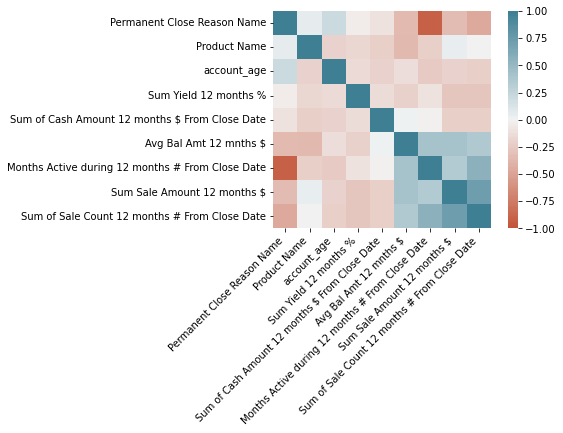

In [31]:
corr = corr_ad_Data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

<AxesSubplot:>

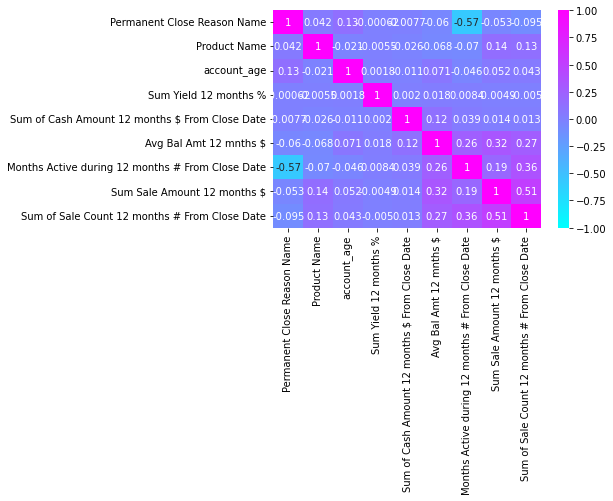

In [32]:
%matplotlib inline
sns.heatmap(corr_ad_Data, vmin = -1, vmax = 1, annot = True, cmap= 'cool')

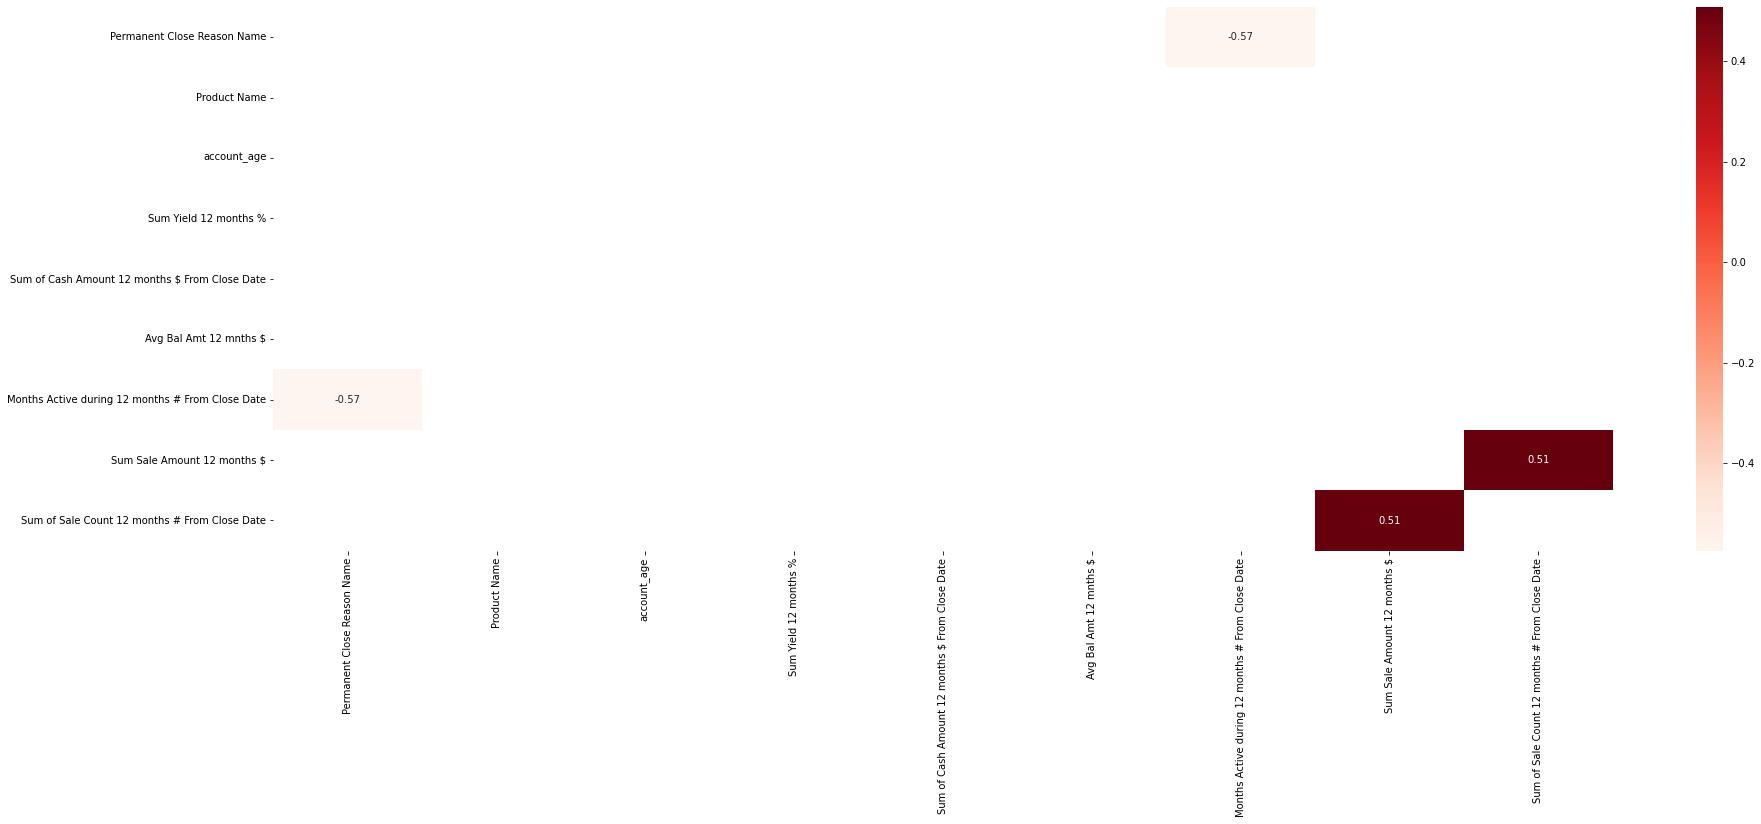

In [33]:
dfCorr = mdf2.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

# variance_inflation_factor

In [34]:
vif =[] # empty list
for i in range(mdf2.shape[1]):
    vif.append(variance_inflation_factor(exog=mdf2.values,exog_idx=i))

pd.DataFrame({'coef name' : mdf2.columns,
             'vif':np.around(vif,3)})

,coef name,vif
0,Permanent Close Reason Name,1.600
1,Product Name,3.519
2,account_age,6.760
3,Sum Yield 12 months %,1.003
4,Sum of Cash Amount 12 months $ From Close Date,1.026
5,Avg Bal Amt 12 mnths $,1.564
6,Months Active during 12 months # From Close Date,5.987
7,Sum Sale Amount 12 months $,1.642
8,Sum of Sale Count 12 months # From Close Date,2.255


# Outlier Analysis

In [35]:
def outlier_analysis(col):
    Q1=mdf2[col].quantile(0.25)
    Q3=mdf2[col].quantile(0.75)
    IQR=Q3-Q1
    UIF=Q3+1.5*(IQR)
    LIF=Q1-1.5*(IQR)
    data_out =mdf2[(mdf2[col]<LIF) | (mdf2[col]>UIF)] 
    sns.distplot(data_out[col])    #Plotting univariate distributions.By default, this will draw a histogram and fit a kernel density estimate (KDE)
   
    return data_out[col] .describe()

# Yield 

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    1798.000000
mean        0.642998
std        18.710763
min      -225.600000
25%        -0.270000
50%         0.350000
75%         0.560000
max       660.000000
Name: Sum Yield 12 months %, dtype: float64

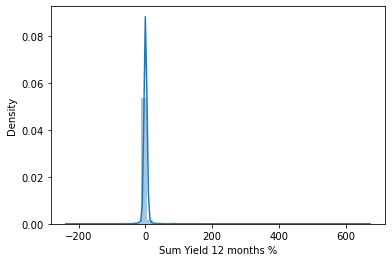

In [36]:
outlier_analysis('Sum Yield 12 months %')

In [37]:
mdf2['Sum Yield 12 months %'].min()

-225.6

In [38]:
mdf2['Sum Yield 12 months %'].max()

660.0

In [39]:
mdf2['Sum Yield 12 months %'].values[mdf2['Sum Yield 12 months %'].values <= 0] = 0

In [40]:
mdf2['Sum Yield 12 months %'].values[mdf2['Sum Yield 12 months %'].values > 0.30] = 0.31

In [41]:
mdf2['Sum Yield 12 months %'].min()

0.0

In [42]:
mdf2['Sum Yield 12 months %'].max()

0.31

<AxesSubplot:xlabel='Sum Yield 12 months %'>

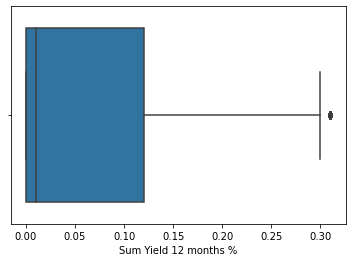

In [43]:
sns.boxplot(x=mdf2['Sum Yield 12 months %'])

# Cash Amount 

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    26166.000000
mean      1286.435412
std       3415.409888
min         20.000000
25%        120.000000
50%        357.000000
75%       1015.000000
max      89222.000000
Name: Sum of Cash Amount 12 months $ From Close Date, dtype: float64

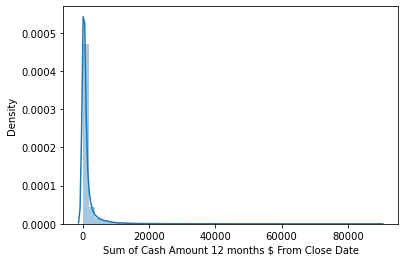

In [44]:
outlier_analysis('Sum of Cash Amount 12 months $ From Close Date')

In [45]:
mdf2['Sum of Cash Amount 12 months $ From Close Date'].min()

0.0

In [46]:
mdf2['Sum of Cash Amount 12 months $ From Close Date'].max()

89222.0

In [47]:
mdf2['Sum of Cash Amount 12 months $ From Close Date'].values[mdf2['Sum of Cash Amount 12 months $ From Close Date'].values > 5000] = 5001

In [48]:
mdf2['Sum of Cash Amount 12 months $ From Close Date'].min()

0.0

In [49]:
mdf2['Sum of Cash Amount 12 months $ From Close Date'].max()

5001.0

<AxesSubplot:xlabel='Sum of Cash Amount 12 months $ From Close Date'>

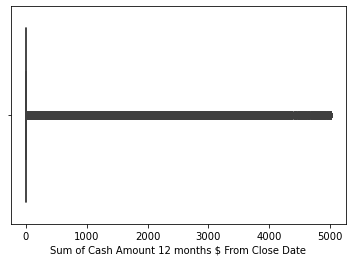

In [50]:
sns.boxplot(x=mdf2['Sum of Cash Amount 12 months $ From Close Date'])

# Balance Amount

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count     34093.000000
mean       6854.201302
std        3974.751188
min      -35408.000000
25%        4382.000000
50%        5731.000000
75%        8112.000000
max      132148.000000
Name: Avg Bal Amt 12 mnths $, dtype: float64

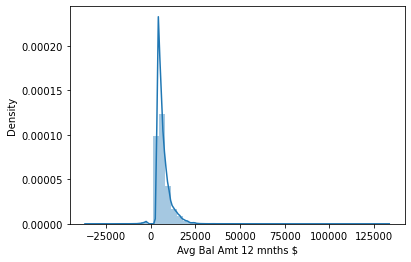

In [51]:
outlier_analysis('Avg Bal Amt 12 mnths $')

<AxesSubplot:xlabel='Avg Bal Amt 12 mnths $'>

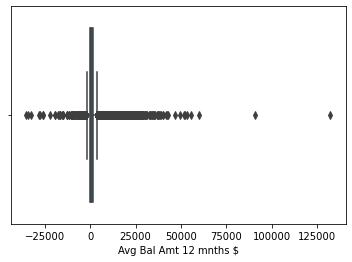

In [52]:
sns.boxplot(x=mdf2['Avg Bal Amt 12 mnths $'])

In [53]:
mdf2['Avg Bal Amt 12 mnths $'].min()

-35408.0

In [54]:
mdf2['Avg Bal Amt 12 mnths $'].max()

132148.0

In [55]:
mdf2['Avg Bal Amt 12 mnths $'].values[mdf2['Avg Bal Amt 12 mnths $'].values <= 0] = 0

In [56]:
mdf2['Avg Bal Amt 12 mnths $'].values[mdf2['Avg Bal Amt 12 mnths $'].values > 10000] = 10001

In [57]:
mdf2['Avg Bal Amt 12 mnths $'].min()

0.0

In [58]:
mdf2['Avg Bal Amt 12 mnths $'].max()

10001.0

# Sum Sale Amount 12 months $

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    2.841400e+04
mean     5.309876e+04
std      6.668124e+04
min      2.391300e+04
25%      2.900800e+04
50%      3.724500e+04
75%      5.390875e+04
max      2.697522e+06
Name: Sum Sale Amount 12 months $, dtype: float64

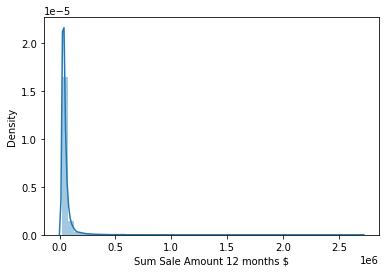

In [59]:
outlier_analysis('Sum Sale Amount 12 months $')

<AxesSubplot:xlabel='Sum Sale Amount 12 months $'>

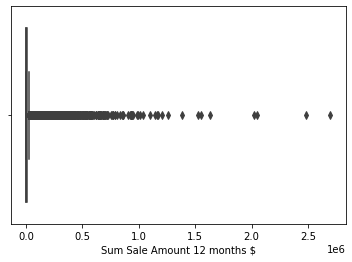

In [60]:
sns.boxplot(x=mdf2['Sum Sale Amount 12 months $'])

In [61]:
 mdf2['Sum Sale Amount 12 months $'].min()

0.0

In [62]:
 mdf2['Sum Sale Amount 12 months $'].max()

2697522.0

In [63]:
mdf2['Sum Sale Amount 12 months $'].values[mdf2['Sum Sale Amount 12 months $'].values > 50000] = 50001

In [64]:
 mdf2['Sum Sale Amount 12 months $'].min()

0.0

In [65]:
 mdf2['Sum Sale Amount 12 months $'].max()

50001.0

# Sum of Sale Count 12 months # From Close Date

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    23996.00000
mean       526.15040
std        200.46064
min        331.00000
25%        385.00000
50%        464.00000
75%        600.00000
max       2846.00000
Name: Sum of Sale Count 12 months # From Close Date, dtype: float64

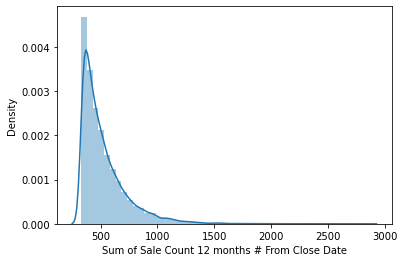

In [66]:
outlier_analysis('Sum of Sale Count 12 months # From Close Date')

<AxesSubplot:xlabel='Sum of Sale Count 12 months # From Close Date'>

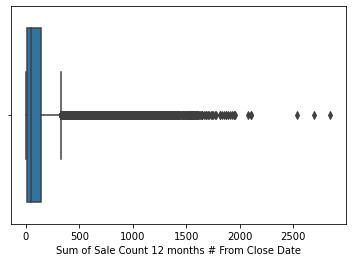

In [67]:
sns.boxplot(x=mdf2['Sum of Sale Count 12 months # From Close Date'])

In [68]:
 mdf2['Sum of Sale Count 12 months # From Close Date'].min()

0.0

In [69]:
 mdf2['Sum of Sale Count 12 months # From Close Date'].max()

2846.0

In [70]:
mdf2['Sum of Sale Count 12 months # From Close Date'].values[mdf2['Sum of Sale Count 12 months # From Close Date'].values > 686] = 686

In [71]:
 mdf2['Sum of Sale Count 12 months # From Close Date'].min()

0.0

In [72]:
 mdf2['Sum of Sale Count 12 months # From Close Date'].max()

686.0

# Months Active during 12 months # From Close Date

outlier_analysis('BEACON_Score')

sns.boxplot(x=mdf2['BEACON_Score'])

  mdf2['BEACON_Score'].min()

  mdf2['BEACON_Score'].max()

# Zero Beacon Score for 21264 account id 

j= mdf2['BEACON_Score']
len([1 for i in j if i == 0])

# account_age

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    166.000000
mean       3.343373
std        0.569038
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: account_age, dtype: float64

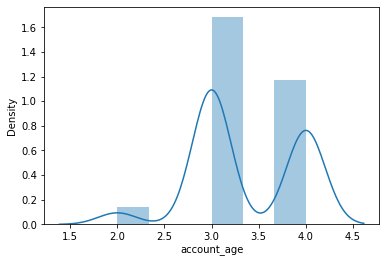

In [73]:
outlier_analysis('account_age')

<AxesSubplot:xlabel='account_age'>

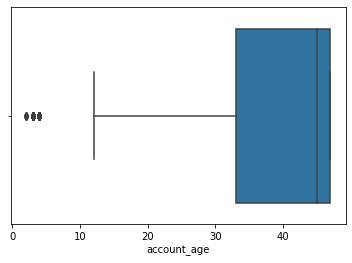

In [74]:
sns.boxplot(x=mdf2['account_age'])

In [75]:
 mdf2['account_age'].min()

2

In [76]:
 mdf2['account_age'].max()

47

# Close Reason

In [77]:
Close_Reason = mdf2['Permanent Close Reason Name'].value_counts()
Close_Reason 

0    281066
1     30143
Name: Permanent Close Reason Name, dtype: int64

# Understanding Data

In [78]:
mdf2.astype('object').describe().transpose()

,count,unique,top,freq
Permanent Close Reason Name,311209.0,2.0,0.0,281066.0
Product Name,311209.0,7.0,2.0,184772.0
account_age,311209.0,39.0,47.0,148645.0
Sum Yield 12 months %,311209.0,32.0,0.0,152341.0
Sum of Cash Amount 12 months $ From Close Date,311209.0,3112.0,0.0,285043.0
Avg Bal Amt 12 mnths $,311209.0,9579.0,0.0,43897.0
Months Active during 12 months # From Close Date,311209.0,15.0,12.0,185778.0
Sum Sale Amount 12 months $,311209.0,36321.0,0.0,43718.0
Sum of Sale Count 12 months # From Close Date,311209.0,687.0,0.0,33992.0


In [79]:
mdf2.dtypes  

Permanent Close Reason Name                           int64
Product Name                                          int64
account_age                                           int64
Sum Yield 12 months %                               float64
Sum of Cash Amount 12 months $ From Close Date      float64
Avg Bal Amt 12 mnths $                              float64
Months Active during 12 months # From Close Date    float64
Sum Sale Amount 12 months $                         float64
Sum of Sale Count 12 months # From Close Date       float64
dtype: object

In [80]:
mdf2.head()

,Permanent Close Reason Name,Product Name,account_age,Sum Yield 12 months %,Sum of Cash Amount 12 months $ From Close Date,Avg Bal Amt 12 mnths $,Months Active during 12 months # From Close Date,Sum Sale Amount 12 months $,Sum of Sale Count 12 months # From Close Date
0,0,0,47,0.12,1440.0,5167.0,12.0,3078.0,69.0
1,0,1,47,0.00,0.0,2523.0,12.0,34704.0,325.0
2,0,2,42,0.13,0.0,843.0,5.0,5558.0,6.0
3,0,2,47,0.20,0.0,2933.0,12.0,69.0,1.0
4,0,3,47,0.01,84.0,186.0,12.0,6203.0,300.0


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

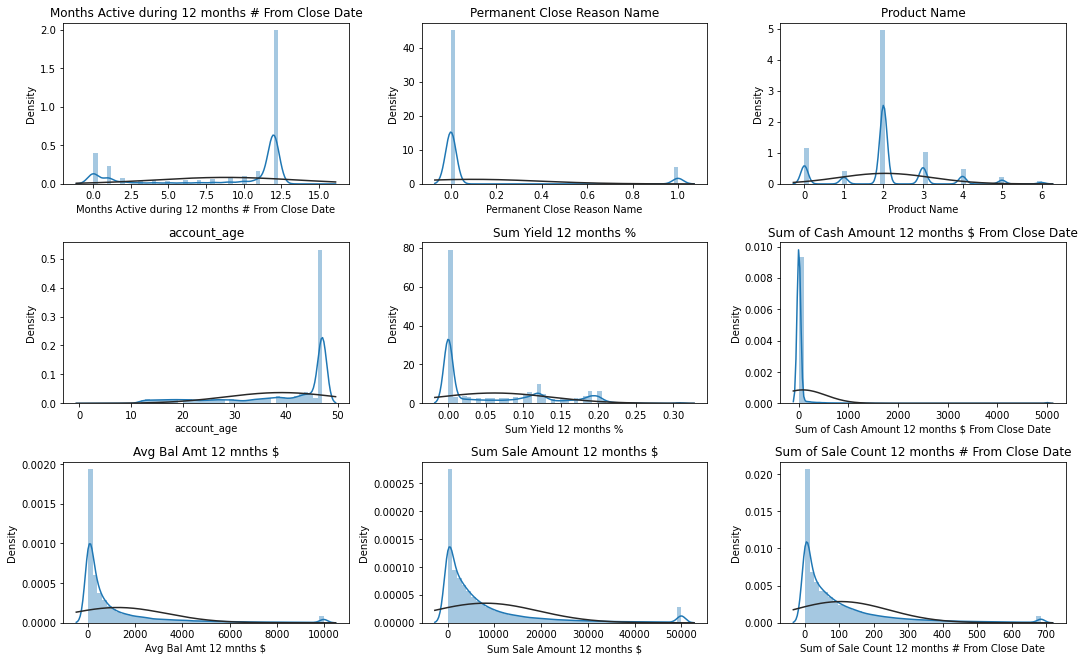

In [81]:
from scipy.stats import norm 

graph_by_variables = ['Months Active during 12 months # From Close Date','Permanent Close Reason Name','Product Name','account_age','Sum Yield 12 months %','Sum of Cash Amount 12 months $ From Close Date','Avg Bal Amt 12 mnths $','Sum Sale Amount 12 months $','Sum of Sale Count 12 months # From Close Date']
plt.figure(figsize=(15,18))

for i in range(0,9):
    plt.subplot(6,3,i+1)
    sns.distplot(mdf2[graph_by_variables[i]].dropna(),fit=norm)
    plt.title(graph_by_variables[i])

plt.tight_layout()

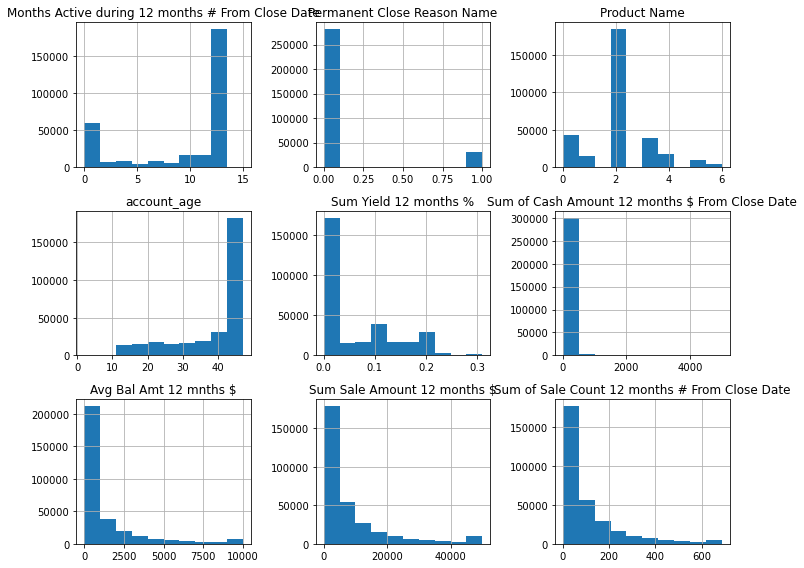

In [82]:
mdf2[['Months Active during 12 months # From Close Date','Permanent Close Reason Name','Product Name','account_age','Sum Yield 12 months %','Sum of Cash Amount 12 months $ From Close Date','Avg Bal Amt 12 mnths $','Sum Sale Amount 12 months $','Sum of Sale Count 12 months # From Close Date']].hist(figsize=(10,8))
plt.tight_layout()

In [83]:
#Perform One Hot Encoding using get_dummies method
mdf2 = pd.get_dummies(mdf2, columns = ['Product Name','account_age','Months Active during 12 months # From Close Date'],
                              drop_first=True)


In [84]:
mdf2.head()

,Permanent Close Reason Name,Sum Yield 12 months %,Sum of Cash Amount 12 months $ From Close Date,Avg Bal Amt 12 mnths $,Sum Sale Amount 12 months $,Sum of Sale Count 12 months # From Close Date,Product Name_1,Product Name_2,Product Name_3,Product Name_4,...,Months Active during 12 months # From Close Date_5.0,Months Active during 12 months # From Close Date_6.0,Months Active during 12 months # From Close Date_7.0,Months Active during 12 months # From Close Date_8.0,Months Active during 12 months # From Close Date_9.0,Months Active during 12 months # From Close Date_10.0,Months Active during 12 months # From Close Date_11.0,Months Active during 12 months # From Close Date_12.0,Months Active during 12 months # From Close Date_13.0,Months Active during 12 months # From Close Date_15.0
0,0,0.12,1440.0,5167.0,3078.0,69.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0.00,0.0,2523.0,34704.0,325.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0.13,0.0,843.0,5558.0,6.0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0.20,0.0,2933.0,69.0,1.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0.01,84.0,186.0,6203.0,300.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [85]:
#Perform Feature Scaling and One Hot Encoding
from sklearn.preprocessing import StandardScaler

#Perform Feature Scaling on 'tenure', 'MonthlyCharges', 'TotalCharges' in order to bring them on same scale
standardScaler = StandardScaler()
columns_for_ft_scaling = ['Sum Yield 12 months %','Sum of Cash Amount 12 months $ From Close Date','Sum of Cash Amount 12 months $ From Close Date','Sum Sale Amount 12 months $','Sum of Sale Count 12 months # From Close Date']

#Apply the feature scaling operation on dataset using fit_transform() method
mdf2[columns_for_ft_scaling] = standardScaler.fit_transform(mdf2[columns_for_ft_scaling])

In [86]:
mdf2.head()

,Permanent Close Reason Name,Sum Yield 12 months %,Sum of Cash Amount 12 months $ From Close Date,Avg Bal Amt 12 mnths $,Sum Sale Amount 12 months $,Sum of Sale Count 12 months # From Close Date,Product Name_1,Product Name_2,Product Name_3,Product Name_4,...,Months Active during 12 months # From Close Date_5.0,Months Active during 12 months # From Close Date_6.0,Months Active during 12 months # From Close Date_7.0,Months Active during 12 months # From Close Date_8.0,Months Active during 12 months # From Close Date_9.0,Months Active during 12 months # From Close Date_10.0,Months Active during 12 months # From Close Date_11.0,Months Active during 12 months # From Close Date_12.0,Months Active during 12 months # From Close Date_13.0,Months Active during 12 months # From Close Date_15.0
0,0,0.782976,2.930166,5167.0,-0.440070,-0.251221,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,-0.818319,-0.168209,2523.0,2.346830,1.580595,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0.916418,-0.168209,843.0,-0.221531,-0.702020,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.850507,-0.168209,2933.0,-0.705225,-0.737797,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,-0.684878,0.012529,186.0,-0.164694,1.401707,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [87]:
mdf2.astype('object').describe().transpose()

,count,unique,top,freq
Permanent Close Reason Name,311209.0,2.0,0.000000,281066.0
Sum Yield 12 months %,311209.0,32.0,-0.818319,152341.0
Sum of Cash Amount 12 months $ From Close Date,311209.0,3112.0,-0.168209,285043.0
Avg Bal Amt 12 mnths $,311209.0,9579.0,0.000000,43897.0
Sum Sale Amount 12 months $,311209.0,36321.0,-0.711305,43718.0
...,...,...,...,...
Months Active during 12 months # From Close Date_10.0,311209.0,2.0,0.000000,301981.0
Months Active during 12 months # From Close Date_11.0,311209.0,2.0,0.000000,295246.0
Months Active during 12 months # From Close Date_12.0,311209.0,2.0,1.000000,185778.0
Months Active during 12 months # From Close Date_13.0,311209.0,2.0,0.000000,310983.0


In [88]:
mdf2.columns

Index(['Permanent Close Reason Name', 'Sum Yield 12 months %',
       'Sum of Cash Amount 12 months $ From Close Date',
       'Avg Bal Amt 12 mnths $', 'Sum Sale Amount 12 months $',
       'Sum of Sale Count 12 months # From Close Date', 'Product Name_1',
       'Product Name_2', 'Product Name_3', 'Product Name_4', 'Product Name_5',
       'Product Name_6', 'account_age_3', 'account_age_4', 'account_age_12',
       'account_age_13', 'account_age_14', 'account_age_15', 'account_age_16',
       'account_age_17', 'account_age_18', 'account_age_19', 'account_age_20',
       'account_age_21', 'account_age_22', 'account_age_23', 'account_age_24',
       'account_age_25', 'account_age_26', 'account_age_27', 'account_age_28',
       'account_age_29', 'account_age_30', 'account_age_31', 'account_age_32',
       'account_age_33', 'account_age_34', 'account_age_35', 'account_age_36',
       'account_age_37', 'account_age_38', 'account_age_39', 'account_age_40',
       'account_age_41', 'account

# Splitting X, Y

In [89]:
y = mdf2['Permanent Close Reason Name']
X = mdf2.drop(['Permanent Close Reason Name'], axis = 1)

In [90]:
y.value_counts()

0    281066
1     30143
Name: Permanent Close Reason Name, dtype: int64

# Balancing the data using SMOTE

python -m pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org imbalanced-learn

In [92]:
from imblearn.over_sampling import SMOTE

In [93]:
over_sampler = SMOTE(k_neighbors=2)
X_res, y_res = over_sampler.fit_resample(X, y)

In [94]:
y_res.value_counts()

0    281066
1    281066
Name: Permanent Close Reason Name, dtype: int64

# Test Train Split

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=0)

# Scalling the values 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [96]:
y_train.value_counts()

0    224989
1    224716
Name: Permanent Close Reason Name, dtype: int64

In [97]:
y_test.value_counts()

1    56350
0    56077
Name: Permanent Close Reason Name, dtype: int64

# Model Building

#  ------------ Logistic Regression Model -------------

In [98]:
#Fit the logistic Regression Model
LogModel = LogisticRegression(random_state=50)
LogModel.fit(X_train, y_train)

#Predict the value for new, unseen data
Log_Pred = LogModel.predict(X_test)

# Find Accuracy using accuracy_score method
LogModel_Accuracy =round(metrics.accuracy_score(y_test, Log_Pred)*100, 2)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Test score

In [99]:
LogModel.score(X_test,y_test)

0.8815053323489909

# Train Score

In [100]:
LogModel.score(X_train,y_train)

0.8798434529302542

# Confusion Matrix

In [101]:
print(confusion_matrix(y_test,Log_Pred))

[[48314  7763]
 [ 5559 50791]]


# Accuracy Score

In [102]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, Log_Pred))

0.8815053323489909


# classification_report

In [103]:
print(classification_report(y_test,Log_Pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88     56077
           1       0.87      0.90      0.88     56350

    accuracy                           0.88    112427
   macro avg       0.88      0.88      0.88    112427
weighted avg       0.88      0.88      0.88    112427



# K_Fold Cross validation

In [104]:
cross_val_score(LogModel,X,y,cv=5)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

array([0.93888371, 0.93857845, 0.93804826, 0.93674689, 0.93941293])

In [105]:
cross_val_score(LogModel,X,y,cv=5).mean()

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

0.9383340490759524

#    --------------Decision Tree Classification Model ----------------

In [106]:
#Fit the Decision Tree Classification Model
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier(criterion = "gini", random_state = 50)
dtmodel.fit(X_train, y_train) 
  
#Predict the value for new, unseen data
dt_pred = dtmodel.predict(X_test)

# Find Accuracy using accuracy_score method
dt_accuracy = round(metrics.accuracy_score(y_test, dt_pred) * 100, 2)

# Test score

In [107]:
dtmodel.score(X_test,y_test)

0.9636030490896315

# Train Score

In [108]:
dtmodel.score(X_train,y_train)

0.9659710254500172

# Confusion Matrix

In [109]:
print(confusion_matrix(y_test,dt_pred))

[[53558  2519]
 [ 1573 54777]]


# Accuracy Score

In [110]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, dt_pred))

0.9636030490896315


# classification_report

In [111]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     56077
           1       0.96      0.97      0.96     56350

    accuracy                           0.96    112427
   macro avg       0.96      0.96      0.96    112427
weighted avg       0.96      0.96      0.96    112427



# K_Fold Cross validation 

In [112]:
cross_val_score(dtmodel,X,y,cv=5)

array([0.97998136, 0.98145946, 0.98128274, 0.98012596, 0.98036664])

In [113]:
cross_val_score(dtmodel,X,y,cv=5).mean()

0.9806432324367448

#  -------------- Random Forest Classification Model --------------

In [114]:
#Fit the Random Forest Classification Model
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rfmodel.fit(X_train, y_train) 
  
#Predict the value for new, unseen data
rf_pred = rfmodel.predict(X_test)

# Find Accuracy using accuracy_score method
rf_accuracy = round(metrics.accuracy_score(y_test, rf_pred) * 100, 2)

# Test score

In [115]:
rfmodel.score(X_test,y_test)

0.9638254156030135

# Train Score

In [116]:
rfmodel.score(X_train,y_train)

0.9659688017700493

# Confusion Matrix

In [117]:
print(confusion_matrix(y_test,rf_pred))

[[53544  2533]
 [ 1534 54816]]


# Accuracy Score

In [118]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, rf_pred))

0.9638254156030135


# classification_report

In [119]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     56077
           1       0.96      0.97      0.96     56350

    accuracy                           0.96    112427
   macro avg       0.96      0.96      0.96    112427
weighted avg       0.96      0.96      0.96    112427



# K_Fold Cross validation 

cross_val_score(rfmodel,X,y,cv=5)

cross_val_score(rfmodel,X,y,cv=5).mean()

# Print all the scores at a place 

In [120]:
# Compare Several models according to their Accuracies
Model_Comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Decision Tree', 'Random Forest'],
    'Score': [LogModel_Accuracy, 
              dt_accuracy, rf_accuracy]})
Model_Comparison_df = Model_Comparison.sort_values(by='Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Score')
Model_Comparison_df.reset_index()

,Score,Model
0,96.38,Random Forest
1,96.36,Decision Tree
2,88.15,Logistic Regression


In [121]:
mdf3.head()

,Account Hashed,Permanent Close Reason Name,Product Name,account_age,Sum Yield 12 months %,Sum of Cash Amount 12 months $ From Close Date,Avg Bal Amt 12 mnths $,Months Active during 12 months # From Close Date,Sum Sale Amount 12 months $,Sum of Sale Count 12 months # From Close Date
0,000066ba2744aa38935bb5ba5e79365a,NaN,Gold Rewards/Centra,47,0.12,1440.0,5167.0,12.0,3078.0,69.0
1,0001911c5989f23866242c1ee22b935f,NaN,Gold Travel Rewards,47,0.00,0.0,2523.0,12.0,34704.0,325.0
2,0001dbb3a11b021139b3434f3e0482ac,NaN,Classic Cash Back,42,0.13,0.0,843.0,5.0,5558.0,6.0
3,00037d7b00fdeaeeb14a3476ee825291,NaN,Classic Cash Back,47,0.20,0.0,2933.0,12.0,69.0,1.0
4,0004cb1326397cd4239e8a9544eefce0,NaN,Classic,47,0.01,84.0,186.0,12.0,6203.0,300.0


In [122]:
# Predict the probability of Churn of each customer
mdf2['Probability_of_Churn'] = rfmodel.predict_proba(mdf2[X_test.columns])[:,1]

mdf2['Probability_of_Churn'] = rfmodel.predict_proba(mdf2[X_test.columns])[:,1]

In [123]:
# Predicted value stroing into data frame
mdf2['Predicted_value'] = rfmodel.predict(X)

In [124]:
# Create a Dataframe showcasing probability of Churn of each customer
mdf3['Probablity of churn']= mdf2[['Probability_of_Churn']]

In [125]:
mdf3['Predicted_value']= mdf2[['Predicted_value']]

# ------Testing  Start -----

In [126]:
# Predicted value stroing into data frame
mdf2['Predicted_value_testing']= rfmodel.predict(mdf2[X_test.columns])

In [127]:
mdf3['Predicted_value_testing'] = mdf2['Predicted_value_testing']

# ------Testing  End-----

In [128]:
mdf3.head(50)

,Account Hashed,Permanent Close Reason Name,Product Name,account_age,Sum Yield 12 months %,Sum of Cash Amount 12 months $ From Close Date,Avg Bal Amt 12 mnths $,Months Active during 12 months # From Close Date,Sum Sale Amount 12 months $,Sum of Sale Count 12 months # From Close Date,Probablity of churn,Predicted_value,Predicted_value_testing
0,000066ba2744aa38935bb5ba5e79365a,NaN,Gold Rewards/Centra,47,0.12,1440.0,5167.0,12.0,3078.0,69.0,0.010000,0,0
1,0001911c5989f23866242c1ee22b935f,NaN,Gold Travel Rewards,47,0.00,0.0,2523.0,12.0,34704.0,325.0,0.000000,0,0
2,0001dbb3a11b021139b3434f3e0482ac,NaN,Classic Cash Back,42,0.13,0.0,843.0,5.0,5558.0,6.0,0.030000,0,0
3,00037d7b00fdeaeeb14a3476ee825291,NaN,Classic Cash Back,47,0.20,0.0,2933.0,12.0,69.0,1.0,0.000000,0,0
4,0004cb1326397cd4239e8a9544eefce0,NaN,Classic,47,0.01,84.0,186.0,12.0,6203.0,300.0,0.000000,0,0
5,0008ee5d7da360c90c8e819222709bb5,NaN,Classic,43,0.08,0.0,416.0,12.0,5167.0,146.0,0.000000,0,0
6,00090cd835ceb13dab48cf6e2ea5c1c7,NaN,Classic Cash Back,47,0.00,0.0,591.0,11.0,8509.0,21.0,0.000000,0,0
7,000958e193401a602c2e06fff04304b5,NaN,Classic Cash Back,44,-0.01,0.0,-1056.0,12.0,5511.0,69.0,0.000000,0,0
8,0009bc407ca0cabe082157f14f30cb99,NaN,Classic Cash Back,47,0.00,0.0,2599.0,12.0,32111.0,480.0,0.000000,0,0
9,0009c7a9774c05d692ea9a2fe8877176,NaN,Gold Rewards/Centra,40,0.11,0.0,2673.0,12.0,9271.0,90.0,0.000000,0,0


# Exporting Output to CSV

In [129]:
mdf3.to_csv('Attrition_output.csv', index=False)

# --------------------------------------------------------------

# Test Scores

In [130]:
rfmodel.score(X_test,y_test)

0.9638254156030135

In [131]:
dtmodel.score(X_test,y_test)

0.9636030490896315

In [132]:
LogModel.score(X_test,y_test)

0.8815053323489909

# Train Scores

In [133]:
rfmodel.score(X_train,y_train)

0.9659688017700493

In [134]:
dtmodel.score(X_train,y_train)

0.9659710254500172

In [135]:
LogModel.score(X_train,y_train)

0.8798434529302542

# Accuracy score

In [136]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, rf_pred))

0.9638254156030135


In [137]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, dt_pred))

0.9636030490896315


In [138]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, Log_Pred))

0.8815053323489909


# Confusion matrix 

In [139]:
print(confusion_matrix(y_test,rf_pred))

[[53544  2533]
 [ 1534 54816]]


In [140]:
print(confusion_matrix(y_test,dt_pred))

[[53558  2519]
 [ 1573 54777]]


In [141]:
print(confusion_matrix(y_test,Log_Pred))

[[48314  7763]
 [ 5559 50791]]
